In [1]:
from learningAgents import ReinforceAlgorithm
from environmentModel import Model

In [2]:
game = Model(totalDemand = 400, 
               tupleCosts = (57, 71),
              totalStages = 25,
            initState = [400/2,0])

In [3]:
game.reset()

(tensor([200.,   0.]), 0, False)

In [4]:
game.adversaryChoosePrice()

135.5

In [5]:
import torch
import torch.nn as nn
from torch.distributions import Categorical

# Hyperparameters
def NeuralNetwork():
    lr = .003
    num_episodes = 20

    nn_ = 100

    policy = nn.Sequential(
                           nn.Linear(2, nn_), 
                           nn.ReLU(),
                           nn.Linear(nn_,nn_),
                           nn.ReLU(),
                           nn.Linear(nn_,100),                       
                           nn.Softmax(dim=0))
    optim = torch.optim.Adam(policy.parameters(), lr=lr)

    return policy, optim


In [6]:
algorithm = ReinforceAlgorithm(game, NeuralNetwork, 500, 10, discountFactor =.5)

In [7]:
algorithm.solver()

In [8]:
import pandas as pd
profits = pd.DataFrame(game.profit).T
prices = pd.DataFrame(game.prices).T
demandPotential = pd.DataFrame(game.demandPotential).T

In [9]:
demandPotential

,0,1
0,200.000000,200.000000
1,207.500000,192.500000
2,209.250000,190.750000
3,210.125000,189.875000
4,210.562500,189.437500
5,210.781250,189.218750
6,210.890625,189.109375
7,210.945312,189.054688
8,210.972656,189.027344
9,210.986328,189.013672


<AxesSubplot:>

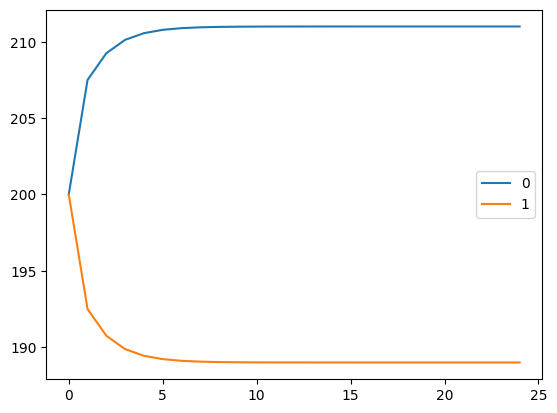

In [10]:
demandPotential.plot()

In [11]:
profits

,0,1
0,5048.250000,4160.250000
1,5646.562500,3690.562500
2,5779.015625,3585.015625
3,5845.816406,3532.816406
4,5879.360352,3506.860352
5,5896.168213,3493.918213
6,5904.581116,3487.456116
7,5908.789810,3484.227310
8,5910.894718,3482.613468
9,5911.947312,3481.806687


<AxesSubplot:>

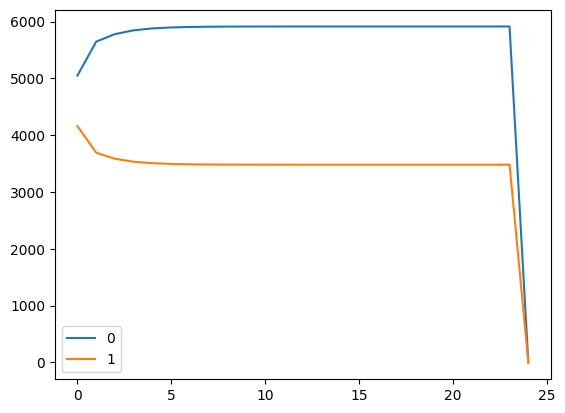

In [12]:
profits.plot()

In [13]:
prices

,0,1
0,120.500000,135.500000
1,128.250000,131.750000
2,129.125000,130.875000
3,129.562500,130.437500
4,129.781250,130.218750
5,129.890625,130.109375
6,129.945312,130.054688
7,129.972656,130.027344
8,129.986328,130.013672
9,129.993164,130.006836


<AxesSubplot:>

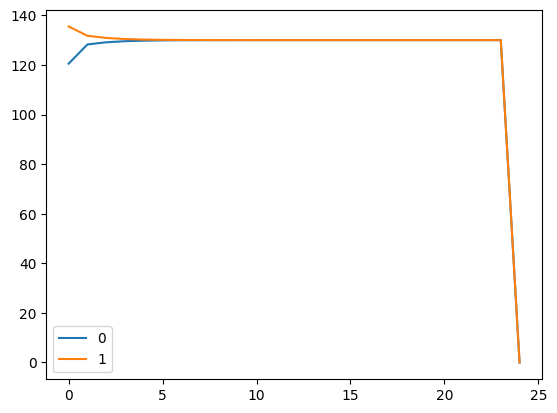

In [14]:
prices.plot()

In [15]:
learning = pd.DataFrame(algorithm.returns.mean(axis = 0))
learning

,0
0,153791.109908
1,153600.472914
2,154603.024026
3,155896.302057
4,156730.630560
5,157066.579989
6,156799.120322
7,156708.545715
8,156160.371392
9,156205.911913


In [16]:
algorithm.returns.shape

(500, 10)

<AxesSubplot:>

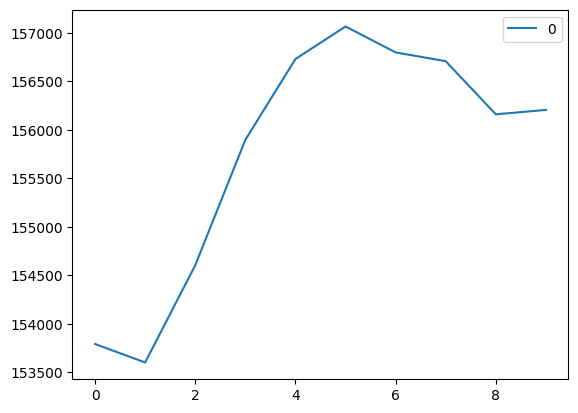

In [17]:
learning.plot()